In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import transformers
from transformers import pipeline

In [2]:
df = pd.read_csv("Opal/Data/preprocessed_osteoporosis_prob.csv")

In [3]:
bin_age = []


for age in df['Age']:
    if age == '7-12':
        bin_age.append('0-44')
    elif age == '13-18':
        bin_age.append('0-44')
    elif age == '19-24':
        bin_age.append('0-44')
    elif age == '25-34':
        bin_age.append('0-44')
    elif age == '35-44':
        bin_age.append('0-44')
    elif age == '45-54':
        bin_age.append('45-54')
    elif age == '55-64':
        bin_age.append('55-64')
    elif age == '65-74':
        bin_age.append('65-74')
    elif age == '75 or over':
        bin_age.append('75+')
    else:
        #missing values
        bin_age.append('')

df['Age'] = bin_age

In [4]:
Review = []

for satisfaction in df['Satisfaction']:
    if satisfaction < 3:
        Review.append('bad')
    else:
        Review.append('good')

df['Review'] = Review

## n-gram helper functions

In [5]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Enhanced stopwording
more_stopwords = {'went', 'go', 'one', 'two', '2', '3', 'side', 'effects'}
stopwords = stopwords.union(more_stopwords)

In [6]:
from collections import defaultdict
import nltk
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
"""import nltk
from collections import defaultdict
from nltk.tokenize import word_tokenize
#nltk.word_tokenize(df_ost['Reviews'].iloc[0])

tokenizer = nltk.RegexpTokenizer(r"\w+")
#new_words = tokenizer.tokenize(df_ost['Reviews'].iloc[0])"""

'import nltk\nfrom collections import defaultdict\nfrom nltk.tokenize import word_tokenize\n#nltk.word_tokenize(df_ost[\'Reviews\'].iloc[0])\n\ntokenizer = nltk.RegexpTokenizer(r"\\w+")\n#new_words = tokenizer.tokenize(df_ost[\'Reviews\'].iloc[0])'

In [7]:
def remove_punc(string):
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, "") 
    return string

In [8]:
def generate_ngrams(text, n_gram=1):
    from nltk.tokenize import word_tokenize
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    #text = tokenizer.tokenize(text)

    token = [token for token in text.lower().split(" ") if token != "" if token not in stopwords]
    token = [remove_punc(i) for i in token]
    #token = [token for token in tokenizer.tokenize(text) if token != "" if token not in STOPWORDS]
    
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [9]:
## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Effectiveness

In [10]:
#have as probabilities instead of 0 or 1
df_effectiveness = df[df["effectiveness"]>0.7]

In [11]:
freq_dict = defaultdict(int)
for sent in df_effectiveness[df_effectiveness["Review"] == 'bad']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(10), 'orange')

freq_dict = defaultdict(int)
for sent in df_effectiveness[df_effectiveness["Review"] == 'good']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(10), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of Bad Reviews", 
                                          "Frequent biagrams of Good Reviews"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Side Effects - Bigrams

In [ ]:
df_side_effects = df[df["side_effect"]>0.7].reset_index()

In [ ]:
freq_dict = defaultdict(int)
for sent in df_side_effects[df_side_effects["Review"] == 'bad']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'orange')

freq_dict = defaultdict(int)
for sent in df_side_effects[df_side_effects["Review"] == 'good']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(30), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of Bad Reviews", 
                                          "Frequent biagrams of Good Reviews"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Classification

In [12]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

### Sample Experimentation

In [13]:
"""#A sample review that contains a) whether the medicine worked b) the type of side effect and c) the delivery method (pill)

sample_review = "This osteoporosis medicine worked, but it gave me a nasty stomach ache. It was easy to swallow."


res = classifier(
    sample_review,
    candidate_labels = ['limb pain', 'gastrointestinal', 'dental', 'cardiac', 'dermatological', 'respiratory' , 'weight gain and loss', 'headache'], 
    multi_class = True
)
res"""

'#A sample review that contains a) whether the medicine worked b) the type of side effect and c) the delivery method (pill)\n\nsample_review = "This osteoporosis medicine worked, but it gave me a nasty stomach ache. It was easy to swallow."\n\n\nres = classifier(\n    sample_review,\n    candidate_labels = [\'limb pain\', \'gastrointestinal\', \'dental\', \'cardiac\', \'dermatological\', \'respiratory\' , \'weight gain and loss\', \'headache\'], \n    multi_class = True\n)\nres'

In [14]:
sides = ['limb pain', 'gastrointestinal', 'dental', 'cardiac', 'dermatological', 'respiratory' , 'weight gain and loss', 'headache', 'flu', 'back pain', 'jaw pain']

In [15]:
#setting empty values for the columns
index = -1
for label in sides:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = sides,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
#df.to_csv('data/updated_df.csv')

In [18]:
df['max'] = df[['limb pain_m', 'gastrointestinal_m', 'dental_m', 'cardiac_m', 'dermatological_m', 'respiratory_m', 'weight gain and loss_m', 'headache_m', 'flu_m', 'back pain_m', 'jaw pain_m']].max(axis=1)
df.head()

,Unnamed: 0,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,...,dental_m,cardiac_m,dermatological_m,respiratory_m,weight gain and loss_m,headache_m,flu_m,back pain_m,jaw pain_m,max
0,0,0-44,Osteoporosis,2010-03-16,lotensin,6883,4,3,this treatment is awsome. I love drugs.,2,...,0.012045,0.090442,0.185604,0.196592,0.087278,0.151928,0.161994,0.240652,0.071465,0.240652
1,1,45-54,Post-Menopausal Osteoporosis Prevention,2017-07-31,lopreeza,167327,5,2,After taking this drug for approx. 21 days I s...,3,...,0.009981,0.067002,0.222304,0.143084,0.031699,0.041735,0.008999,0.065477,0.019531,0.313618
2,2,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,...,0.058516,0.061539,0.294107,0.320504,0.059767,0.015010,0.030076,0.133663,0.017348,0.320504
3,3,65-74,Osteoporosis,2010-05-26,liquid calcium + vitamin d,93396,5,5,since I have a hard time swallowing this hs wo...,5,...,0.369095,0.021584,0.012158,0.062320,0.263505,0.105072,0.340453,0.003163,0.933663,0.983138
4,4,45-54,Osteoporosis,2012-01-19,oyster shell + d,94390,1,1,I have severe pain in my hand and muscle joint...,1,...,0.000074,0.000637,0.001936,0.002675,0.002148,0.038169,0.117373,0.000167,0.000171,0.999138


# Side Effects

In [19]:
df_side_effects = df[df["side_effect"]>0.7].reset_index()

In [20]:
print(len(df))
print(len(df_side_effects))
print(round(len(df_side_effects)/len(df),2))

1357
1312
0.97


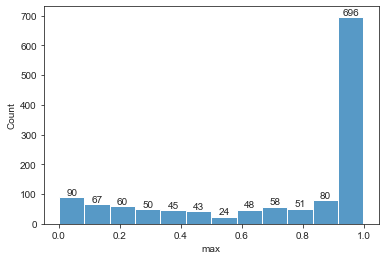

In [21]:
sns.set_style('ticks')
fig, ax = plt.subplots()
ax = sns.histplot(x = 'max', data = df_side_effects)
for container in ax.containers:
    ax.bar_label(container)

In [22]:
print(len(df_side_effects[df_side_effects['max'] > 0.7]))
print(len(df_side_effects))
print(round(len(df_side_effects[df_side_effects['max'] > 0.7])/len(df_side_effects),2))

858
1312
0.65


## Bigrams of < 0.7 confidence

In [24]:
df_side_effects.to_csv('temp.csv', index = False)

In [25]:
df2 = df_side_effects[df_side_effects['max'] < 0.7]

In [26]:
freq_dict = defaultdict(int)
for sent in df2[df2["Review"] == 'bad']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(30), 'orange')

freq_dict = defaultdict(int)
for sent in df2[df2["Review"] == 'good']['Reviews']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(30), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of Bad Reviews", 
                                          "Frequent biagrams of Good Reviews"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

### Modifications

In [ ]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [ ]:
sides2 = ['flu', 'body ache']


#setting empty values for the columns
index = -1
for label in sides2:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = sides2,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

In [ ]:
sides3 = ['back pain']


#setting empty values for the columns
index = -1
for label in sides3:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = sides3,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

In [ ]:
sides4 = ['jaw pain']


#setting empty values for the columns
index = -1
for label in sides4:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = sides4,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

In [ ]:
#A sample review that contains a) whether the medicine worked b) the type of side effect and c) the delivery method (pill)

sample_review = "I have a serious back pain"


res = classifier(
    sample_review,
    candidate_labels = ['flu', 'body pain'], 
    multi_class = True
)
res

# NEED TO CHANGE THIS

In [31]:
side1 = []
side2 = []
side3 = []
side4 = []
side5 = []
side6 = []
side7 = []
side8 = []
side9 = []
side10 = []
side11 = []
side12 = []

thresh = 0.7

for i in range(len(df_side_effects)):
    if df_side_effects['limb pain_m'][i] >= thresh:
        side1.append(1)
    elif df_side_effects['limb pain_m'][i] < thresh:
        side1.append(0)
    
    if df_side_effects['gastrointestinal_m'][i] >= thresh:
        side2.append(1)
    elif df_side_effects['gastrointestinal_m'][i] < thresh:
        side2.append(0)

    if df_side_effects['dental_m'][i] >= thresh:
        side3.append(1)
    elif df_side_effects['dental_m'][i] < thresh:
        side3.append(0)

    if df_side_effects['cardiac_m'][i] >= thresh:
        side4.append(1)
    elif df_side_effects['cardiac_m'][i] < thresh:
        side4.append(0)

    if df_side_effects['dermatological_m'][i] >= thresh:
        side5.append(1)
    elif df_side_effects['dermatological_m'][i] < thresh:
        side5.append(0)

    if df_side_effects['respiratory_m'][i] >= thresh:
        side6.append(1)
    elif df_side_effects['respiratory_m'][i] < thresh:
        side6.append(0)

    if df_side_effects['weight gain and loss_m'][i] >= thresh:
        side7.append(1)
    elif df_side_effects['weight gain and loss_m'][i] < thresh:
        side7.append(0)

    if df_side_effects['headache_m'][i] >= thresh:
        side8.append(1)
    elif df_side_effects['headache_m'][i] < thresh:
        side8.append(0)

    if df_side_effects['flu_m'][i] >= thresh:
        side9.append(1)
    elif df_side_effects['flu_m'][i] < thresh:
        side9.append(0)

    if df_side_effects['back pain_m'][i] >= thresh:
        side10.append(1)
    elif df_side_effects['back pain_m'][i] < thresh:
        side10.append(0)

    if df_side_effects['jaw pain_m'][i] >= thresh:
        side11.append(1)
    elif df_side_effects['jaw pain_m'][i] < thresh:
        side11.append(0)    



df_side_effects['limb pain'] = side1
df_side_effects['gastrointestinal'] = side2
df_side_effects['dental'] = side3
df_side_effects['cardiac'] = side4
df_side_effects['dermatological'] = side5
df_side_effects['respiratory'] = side6
df_side_effects['weight'] = side7
df_side_effects['headache'] = side8
df_side_effects['flu'] = side9
df_side_effects['back pain'] = side10
df_side_effects['jaw pain'] = side11

In [32]:
side_tf = []


thresh = 0.7

for i in range(len(df_side_effects)):
    if df_side_effects['limb pain'][i] == 1:
        side_tf.append('limb')
    elif df_side_effects['gastrointestinal'][i] == 1:
        side_tf.append('gastro')
    elif df_side_effects['dental'][i] == 1:
        side_tf.append('dental')
    elif df_side_effects['cardiac'][i] == 1:
        side_tf.append('cardiac')
    elif df_side_effects['dermatological'][i] == 1:
        side_tf.append('derma')
    elif df_side_effects['respiratory'][i] == 1:
        side_tf.append('respiratory')
    elif df_side_effects['weight'][i] == 1:
        side_tf.append('weight')
    elif df_side_effects['headache'][i] == 1:
        side_tf.append('headache')
    elif df_side_effects['flu'][i] == 1:
        side_tf.append('flu')
    elif df_side_effects['back pain'][i] == 1:
        side_tf.append('back pain')
    elif df_side_effects['jaw pain'][i] == 1:
        side_tf.append('jaw pain')    
    else:
        side_tf.append('other')

df_side_effects['side_tf'] = side_tf

## EDA (age distribution, ie dental things tend to affect older people)

In [34]:
df_side_effects.drop(['Unnamed: 0'], axis = 1)

,index,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,...,dental,cardiac,dermatological,respiratory,weight,headache,flu,back pain,jaw pain,side_tf
0,1,45-54,Post-Menopausal Osteoporosis Prevention,2017-07-31,lopreeza,167327,5,2,After taking this drug for approx. 21 days I s...,3,...,0,0,0,0,0,0,0,0,0,other
1,2,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,...,0,0,0,0,0,0,0,0,0,other
2,4,45-54,Osteoporosis,2012-01-19,oyster shell + d,94390,1,1,I have severe pain in my hand and muscle joint...,1,...,0,0,0,0,0,0,0,0,0,limb
3,5,75+,Osteoporosis,2015-02-23,os-cal 500-vit d3,16527,1,3,Food dyes and talc...large pill for a newly re...,1,...,0,0,0,1,0,0,0,0,0,respiratory
4,6,45-54,Osteoporosis,2012-08-27,os-cal 500-vit d3,16527,5,3,I have taken it for 6 months and it did not in...,1,...,0,0,0,1,0,0,0,0,0,respiratory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1352,55-64,Osteoporosis,2010-11-15,calcium 600 + vitamin d,93224,4,5,The only thing I have to say against these tab...,4,...,0,0,0,0,0,0,0,0,0,gastro
1308,1353,55-64,Osteoporosis,2016-03-16,calcium 500 + vitamin d,151589,4,4,Just started taking this a month ago. Definite...,4,...,0,0,0,0,0,0,0,0,0,gastro
1309,1354,55-64,Osteoporosis,2012-03-08,calcitrate + vit d,19844,3,3,"This supplement has caused much gas, bloating,...",1,...,0,0,0,0,0,0,0,0,0,gastro
1310,1355,65-74,Osteoporosis,2012-07-24,calcitrate,22129,1,1,first dose: one tablet knocked me out cold for...,1,...,0,0,0,0,0,0,0,0,0,gastro


# Side Effects EDA

In [35]:
df_limb = df_side_effects[df_side_effects['limb pain'] == 1]
df_gastro = df_side_effects[df_side_effects['gastrointestinal'] == 1]
df_dental = df_side_effects[df_side_effects['dental'] == 1]
df_cardiac = df_side_effects[df_side_effects['cardiac'] == 1]
df_derma = df_side_effects[df_side_effects['dermatological'] == 1]
df_resp = df_side_effects[df_side_effects['respiratory'] == 1]
df_weight = df_side_effects[df_side_effects['weight'] == 1]
df_headache = df_side_effects[df_side_effects['headache'] == 1]
df_flu = df_side_effects[df_side_effects['flu'] == 1]
df_back = df_side_effects[df_side_effects['back pain'] == 1]
df_jaw = df_side_effects[df_side_effects['jaw pain'] == 1]

In [37]:
total = len(df_side_effects)
print('limb side effects: ', round((len(df_limb)/total)*100,2), '%')
print('gastrointesntinal side effects: ', round((len(df_gastro)/total)*100,2), '%')
print('headache side effects: ', round((len(df_headache)/total)*100,2), '%')
print('respiratory side effects: ', round((len(df_resp)/total)*100,2), '%')
print('weight loss/gain side effects: ', round((len(df_weight)/total)*100,2), '%')
print('dental side effects: ', round((len(df_dental)/total)*100,2), '%')
print('dermatological side effects: ', round((len(df_derma)/total)*100,2), '%')
print('cardiac side effects: ', round((len(df_cardiac)/total)*100,2), '%')
print('flu like side effects: ', round((len(df_flu)/total)*100,2), '%')
print('back pain side effects: ', round((len(df_back)/total)*100,2), '%')
print('jaw pain side effects: ', round((len(df_jaw)/total)*100,2), '%')

limb side effects:  34.68 %
gastrointesntinal side effects:  14.33 %
headache side effects:  11.43 %
respiratory side effects:  5.41 %
weight loss/gain side effects:  3.51 %
dental side effects:  3.35 %
dermatological side effects:  1.75 %
cardiac side effects:  1.22 %
flu like side effects:  6.4 %
back pain side effects:  18.45 %
jaw pain side effects:  7.62 %


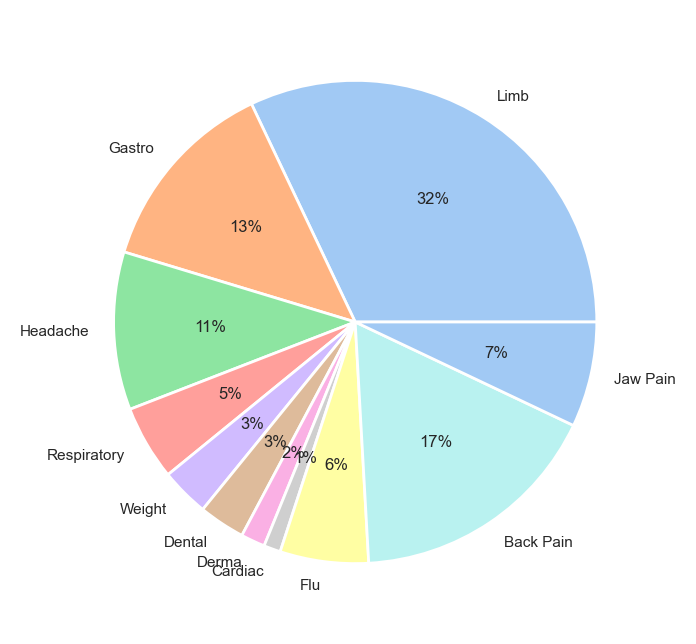

In [49]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200},
        font_scale=0.5,
        style="white"
        )

#define data
data = [round((len(df_limb)/total)*100,2), round((len(df_gastro)/total)*100,2), round((len(df_headache)/total)*100,2), round((len(df_resp)/total)*100,2), round((len(df_weight)/total)*100,2), round((len(df_dental)/total)*100,2), round((len(df_derma)/total)*100,2), round((len(df_cardiac)/total)*100,2), round((len(df_flu)/total)*100,2), round((len(df_back)/total)*100,2), round((len(df_jaw)/total)*100,2)]
labels = ['Limb', 'Gastro', 'Headache', 'Respiratory', 'Weight', 'Dental', 'Derma', 'Cardiac', 'Flu', 'Back Pain', 'Jaw Pain' ]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:11]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Text(0.5, 1.0, 'Limb Pain')

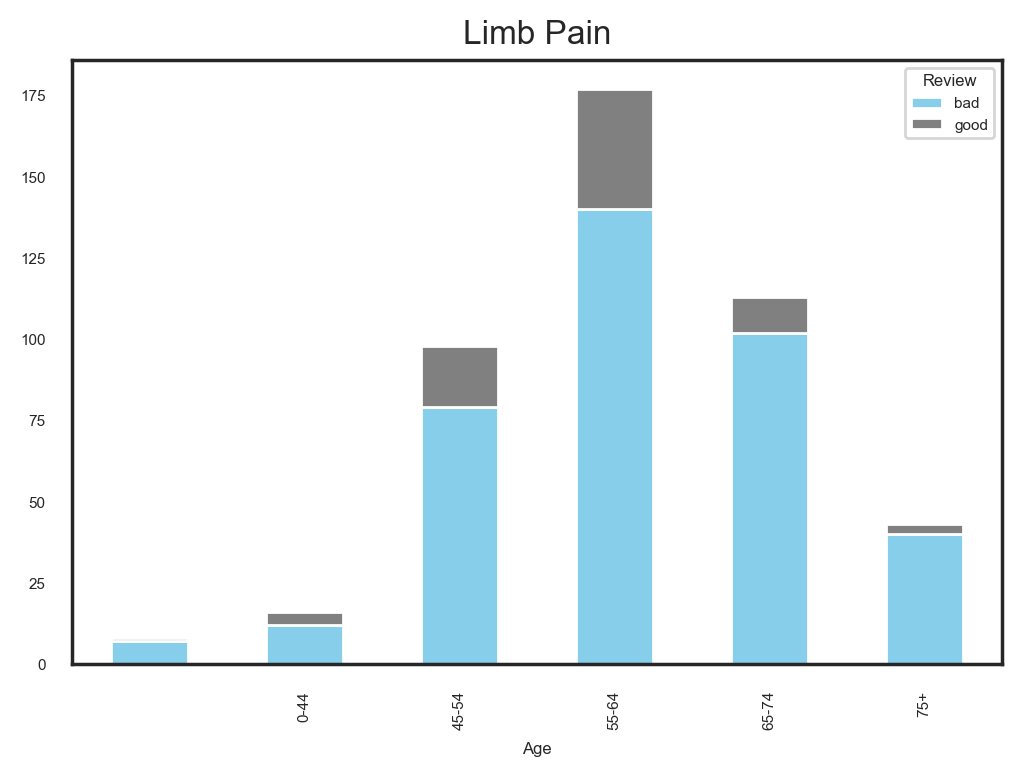

In [41]:
df_plot = df_limb.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True, color=["skyblue", "gray"])
plt.title('Limb Pain', fontsize=12)

Text(0.5, 1.0, 'Gastrointesntinal')

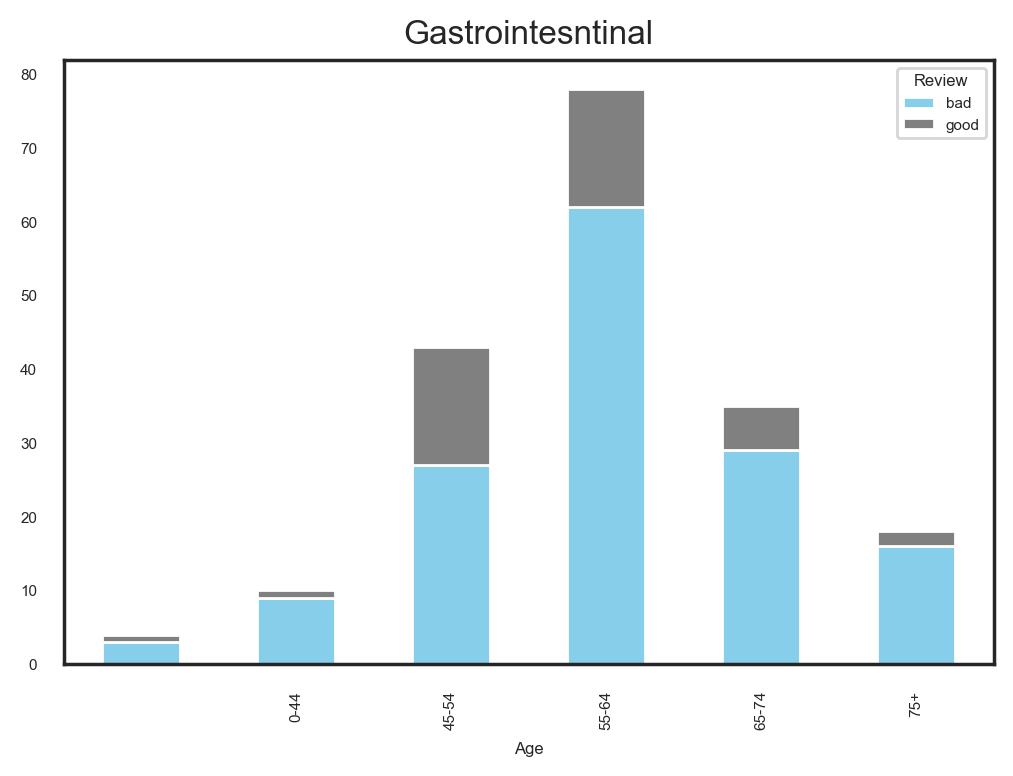

In [42]:
df_plot = df_gastro.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True, color=["skyblue", "gray"])
plt.title('Gastrointesntinal', fontsize=12)

Text(0.5, 1.0, 'Dental')

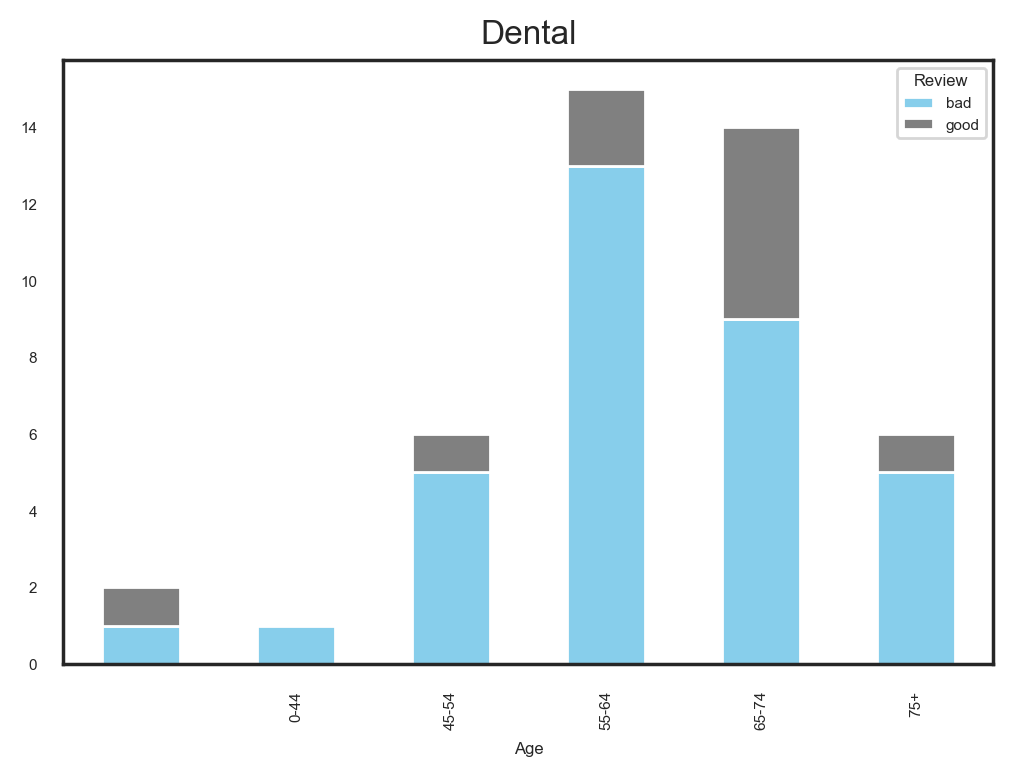

In [43]:
df_plot = df_dental.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True, color=["skyblue", "gray"])
plt.title('Dental', fontsize=12)

Text(0.5, 1.0, 'Cardiac')

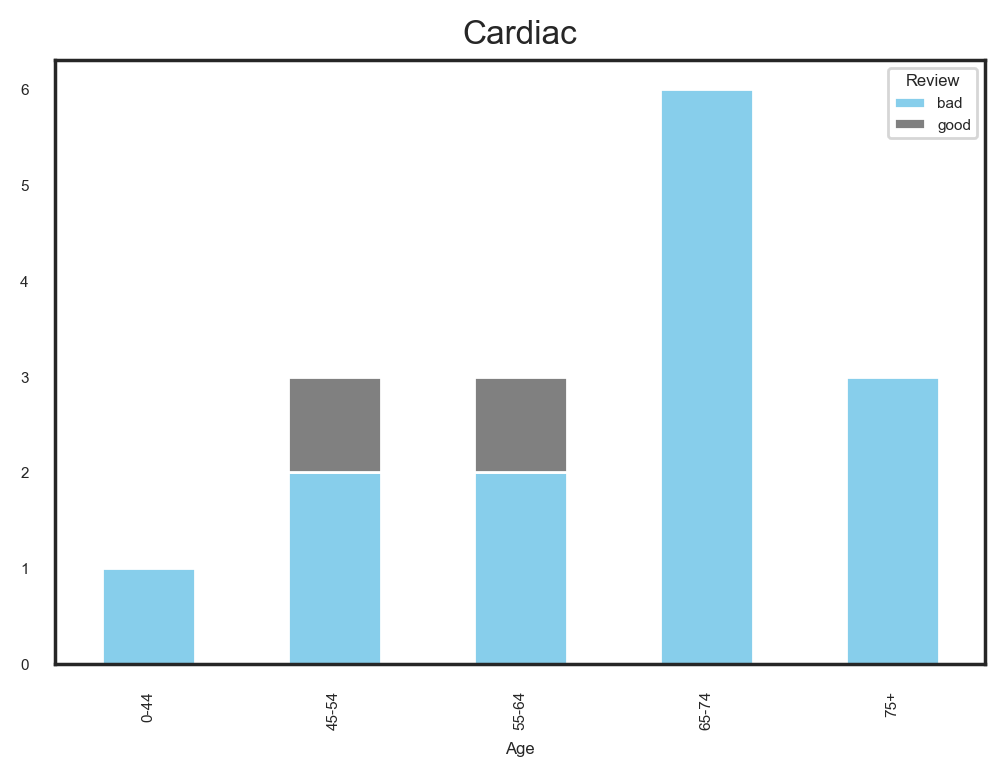

In [44]:
df_plot = df_cardiac.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True, color=["skyblue", "gray"])
plt.title('Cardiac', fontsize=12)

Text(0.5, 1.0, 'Dematological')

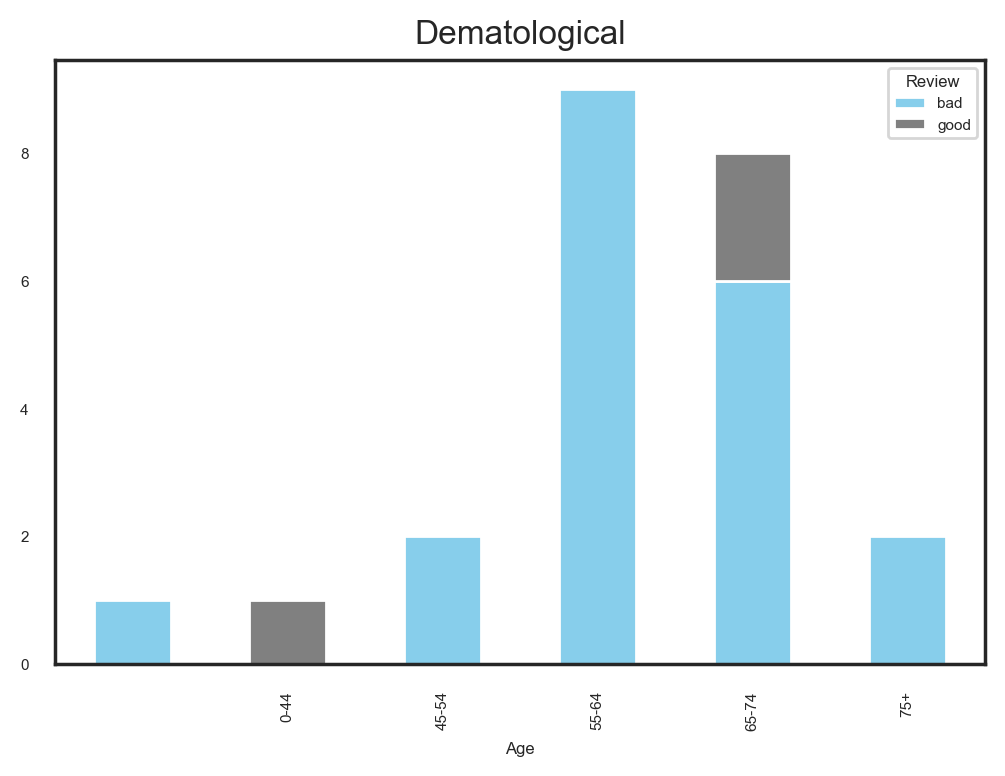

In [45]:
df_plot = df_derma.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True, color=["skyblue", "gray"])
plt.title('Dematological', fontsize=12)

Text(0.5, 1.0, 'Respiratory')

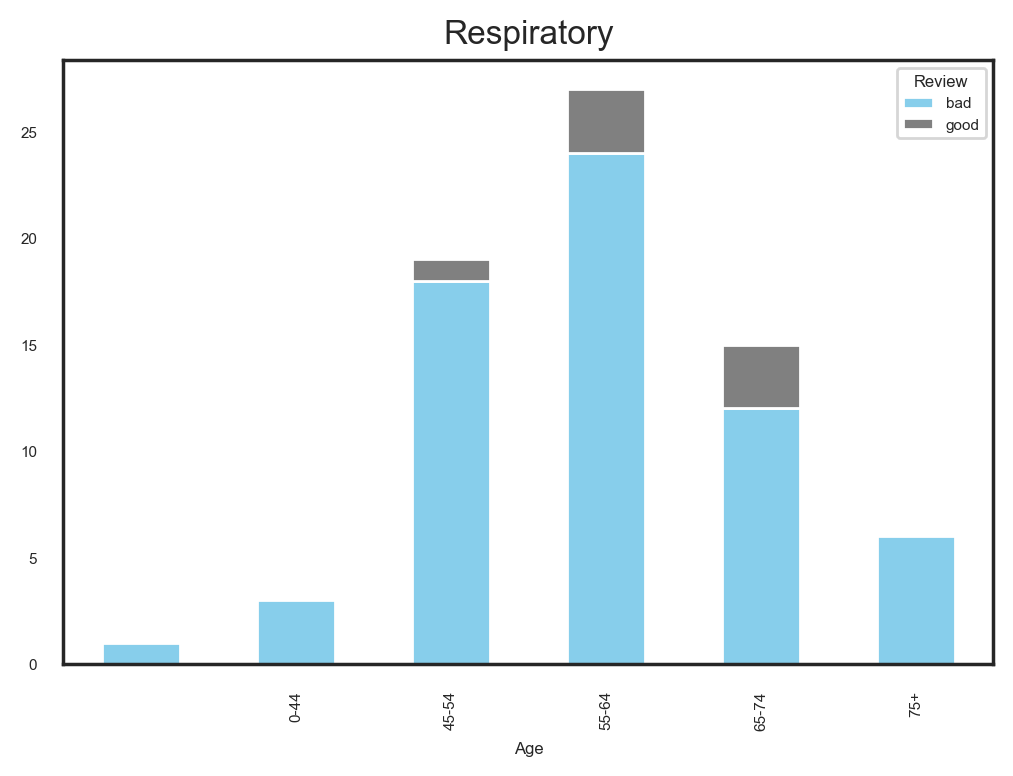

In [46]:
df_plot = df_resp.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True, color=["skyblue", "gray"])
plt.title('Respiratory', fontsize=12)

Text(0.5, 1.0, 'Weight Loss / Gain')

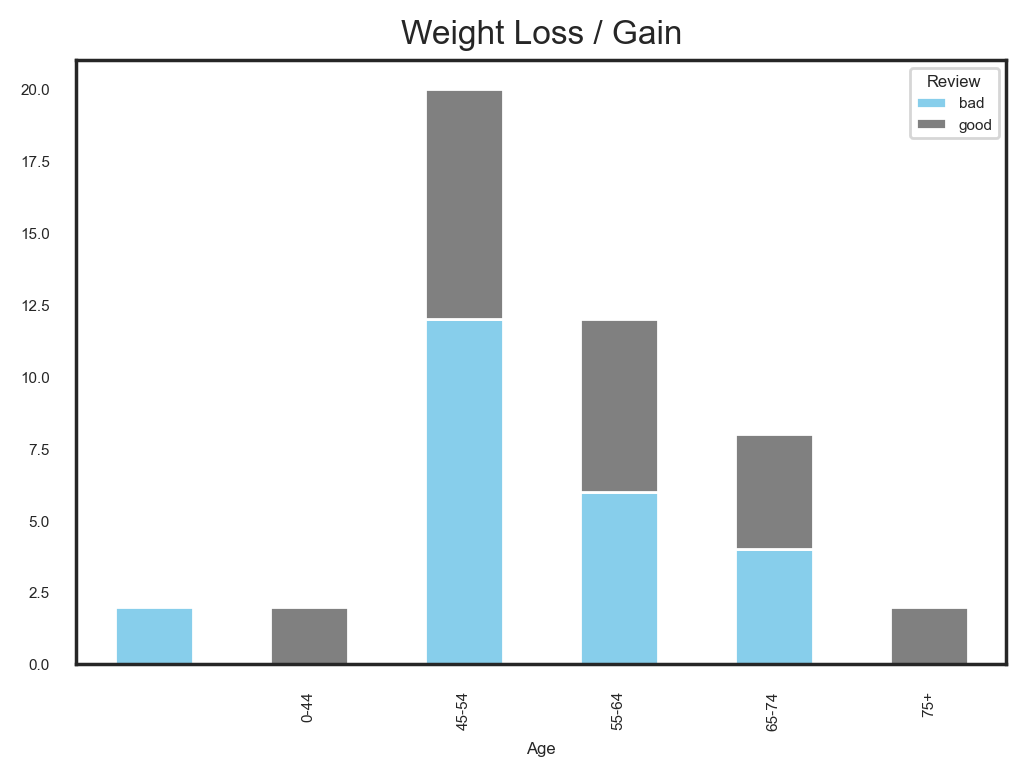

In [47]:
df_plot = df_weight.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
df_plot.plot(kind='bar', stacked=True, color=["skyblue", "gray"])
plt.title('Weight Loss / Gain', fontsize=12)

Text(0.5, 1.0, 'Headache')

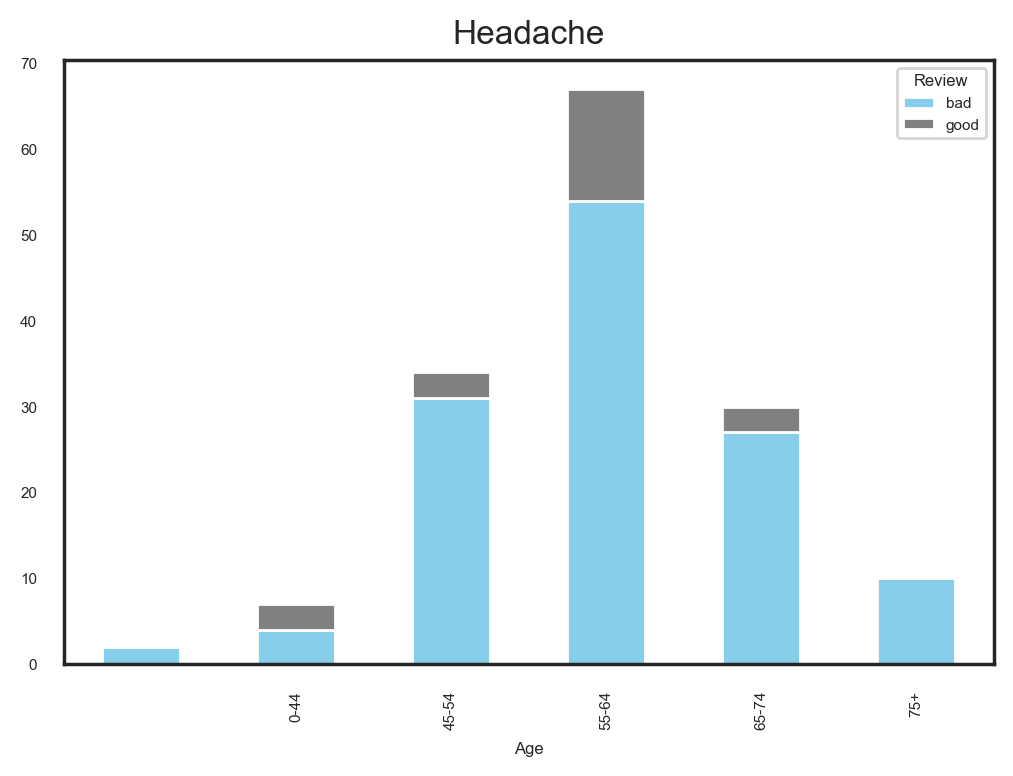

In [48]:
df_plot = df_headache.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
#df_plot
df_plot.plot(kind='bar', stacked=True, color=["skyblue", "gray"])
plt.title('Headache', fontsize=12)

Text(0.5, 1.0, 'FLu')

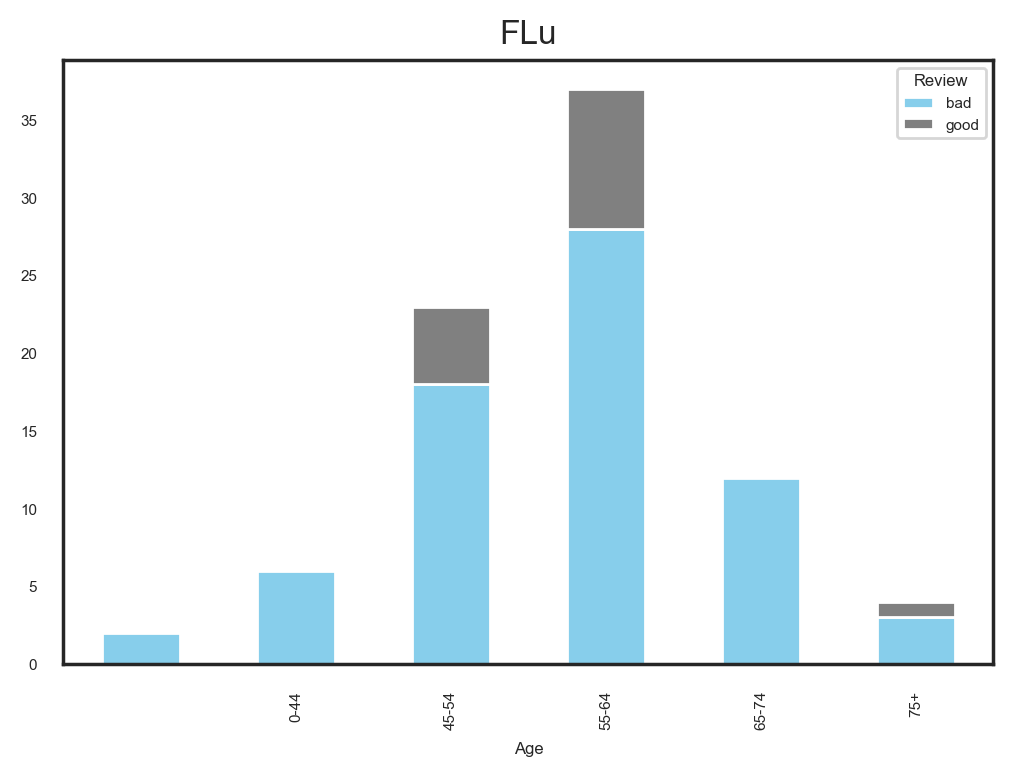

In [50]:
df_plot = df_flu.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
#df_plot
df_plot.plot(kind='bar', stacked=True, color=["skyblue", "gray"])
plt.title('FLu', fontsize=12)

Text(0.5, 1.0, 'Back')

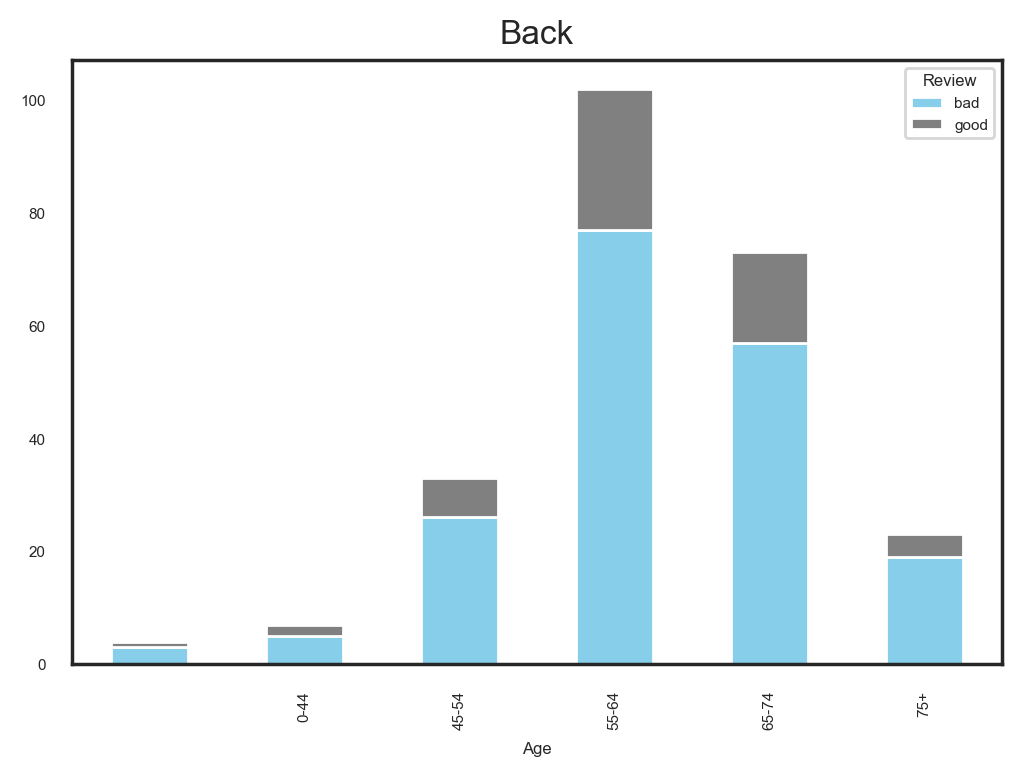

In [52]:
df_plot = df_back.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
#df_plot
df_plot.plot(kind='bar', stacked=True, color=["skyblue", "gray"])
plt.title('Back', fontsize=12)

Text(0.5, 1.0, 'Jaw')

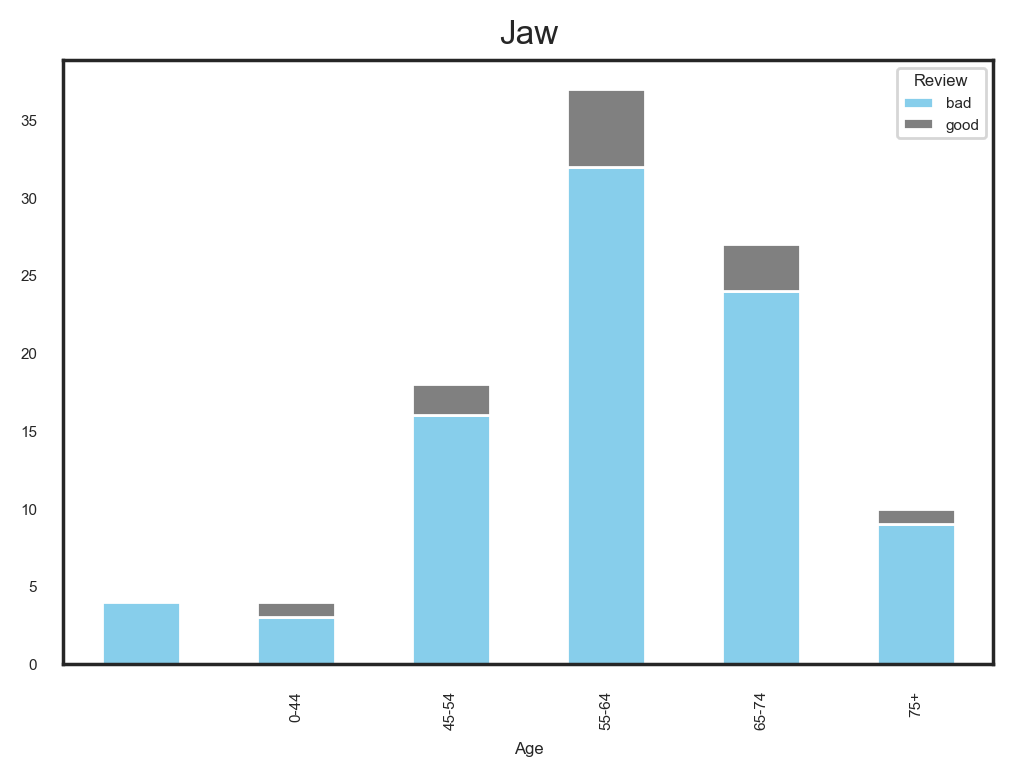

In [51]:
df_plot = df_jaw.groupby(['Age', 'Review']).size().reset_index().pivot(columns='Review', index='Age', values=0)
#df_plot
df_plot.plot(kind='bar', stacked=True, color=["skyblue", "gray"])
plt.title('Jaw', fontsize=12)

# TYMLOS

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df_tymlos = df_side_effects.loc[df_side_effects['Drug'].str.contains("tymlos", case=False)]

In [ ]:
df_tymlos[['Age', 'limb pain_m', 'gastrointestinal_m', 'dental_m', 'cardiac_m', 'dermatological_m', 'respiratory_m', 'weight gain and loss_m', 'headache_m']]

In [ ]:
df_tymlos[['Age', 'limb pain', 'gastrointestinal', 'dental', 'cardiac', 'dermatological', 'respiratory', 'weight', 'headache']]

In [ ]:
print(df_tymlos['Reviews'][800])
print('')
print(df_tymlos['Reviews'][801])
print('')
print(df_tymlos['Reviews'][802])